In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import scipy.stats as stats

X,y  = fetch_california_housing(return_X_y=True,as_frame=True)


In [8]:
X.drop(labels=["Latitude","Longitude"],axis=1,inplace=True)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [16]:
def diagnostic_plots(df, variable):

    

    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30,color="orange")
    plt.title(f"Histogram of {variable}")

   
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

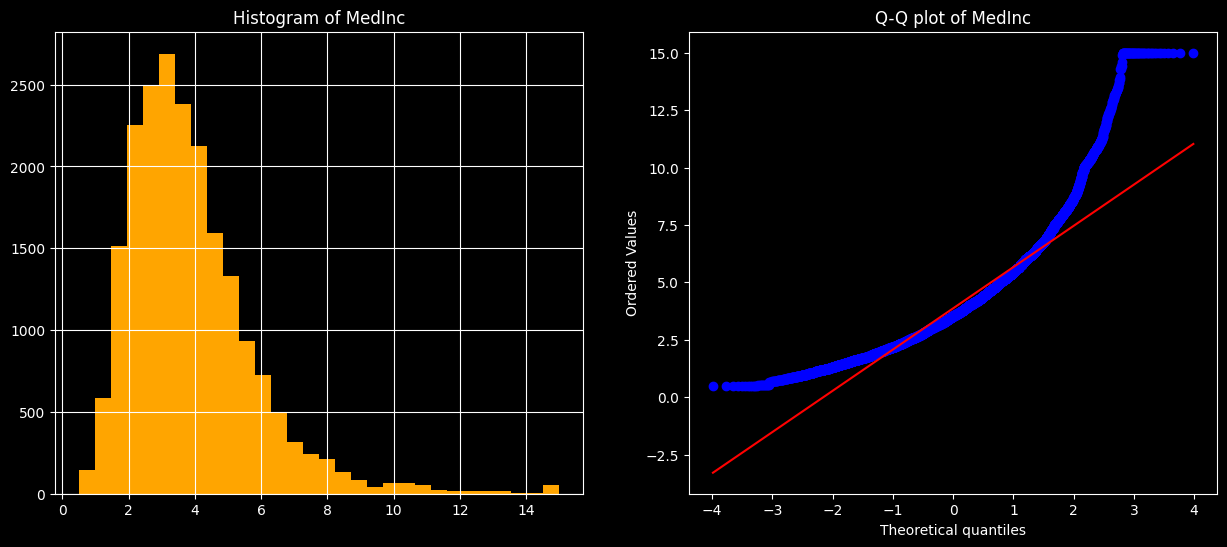

In [17]:
plt.style.use("dark_background")
diagnostic_plots(X, "MedInc")

In [22]:
X_tf = X.copy()
X_tf["MedInc"],param = stats.boxcox(X_tf["MedInc"])
print("optimal lambda: ",param)

optimal lambda:  0.09085449361507383


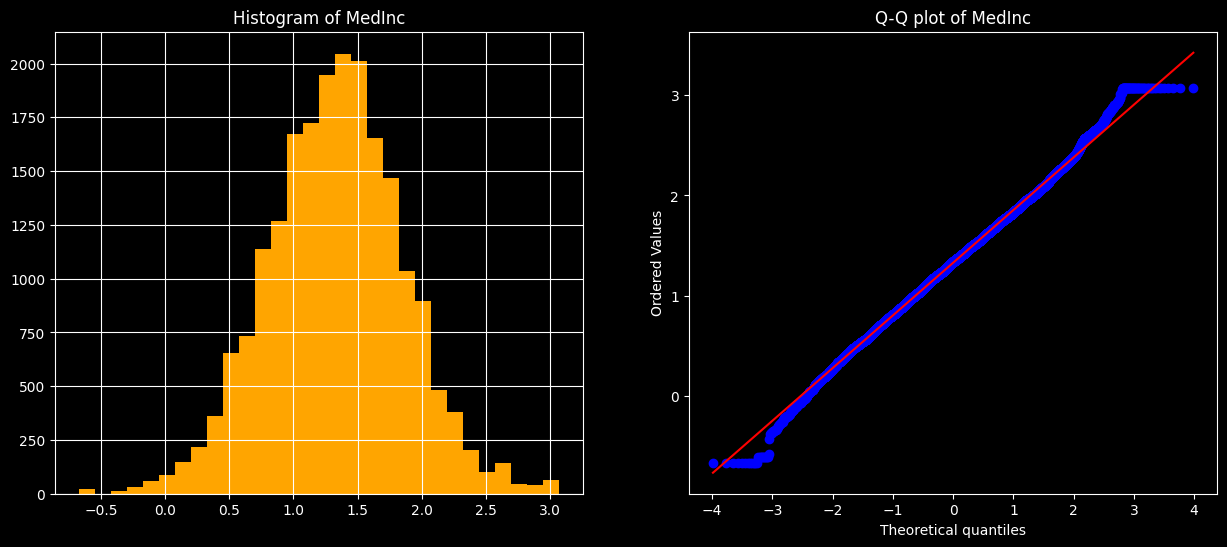

In [24]:
diagnostic_plots(X_tf, "MedInc")

In [26]:
X_tf2 = X.copy()
X_tf2["MedInc"],param = stats.yeojohnson(X_tf2["MedInc"])
print("optimal lambda: ",param)

optimal lambda:  -0.1985098937827175


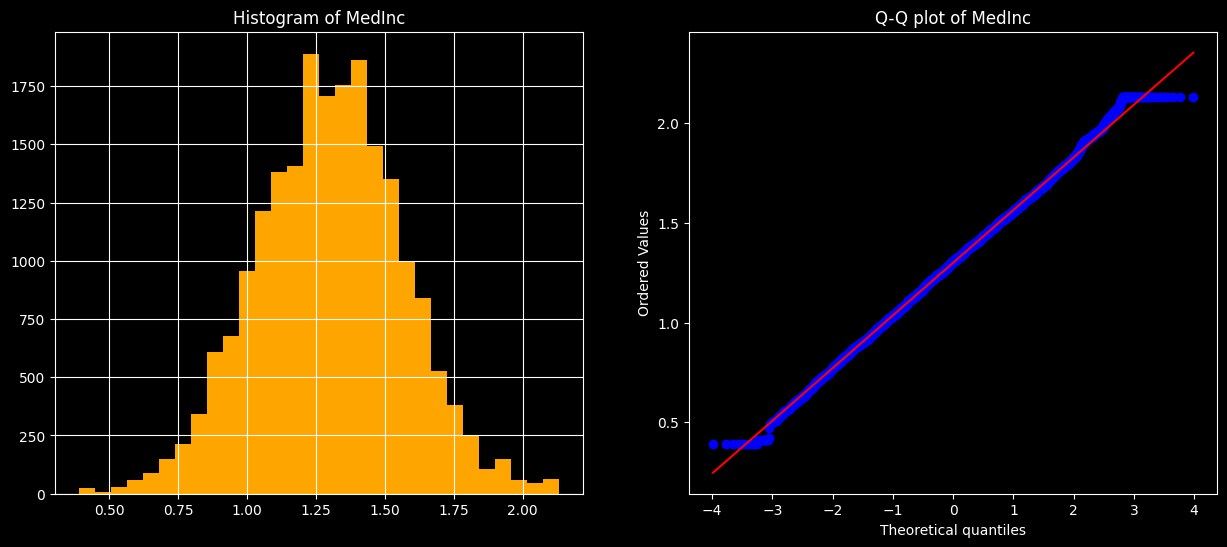

In [27]:
diagnostic_plots(X_tf2, "MedInc")

In [30]:
X_tf3 = X.copy()
variables = ["MedInc","AveRooms","HouseAge"]
X_tf3[variables] = np.log(X_tf3[variables])

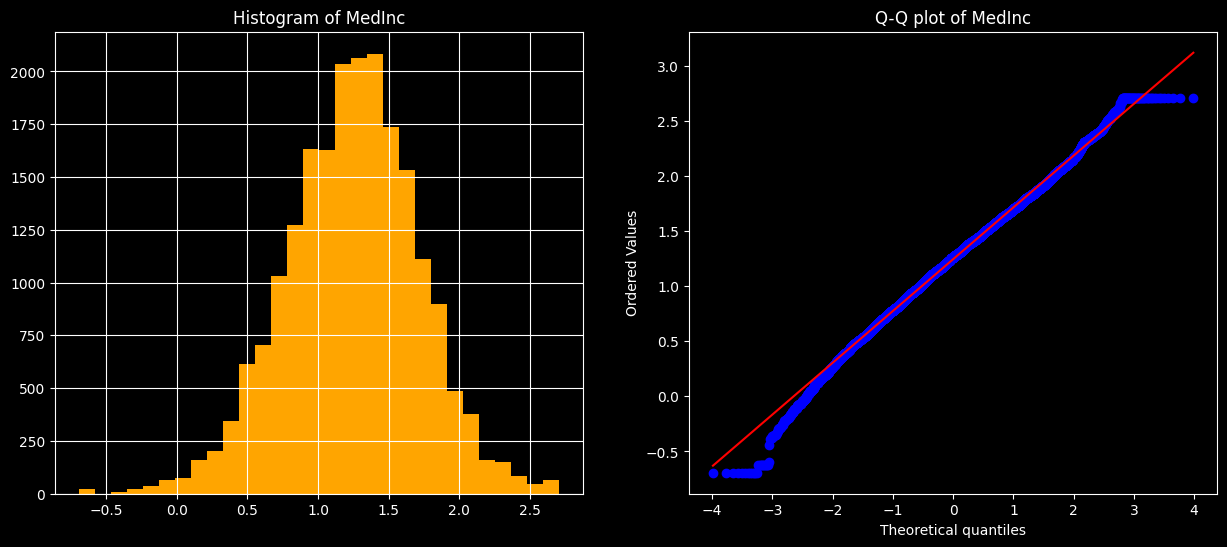

In [31]:
diagnostic_plots(X_tf3, "MedInc")

In [36]:
variables = list(X.columns)

variables

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [37]:

def make_qqplot(df):

    plt.figure(figsize=(10, 6), constrained_layout=True)

    for i in range(6):

        # location in figure
        ax = plt.subplot(2, 3, i + 1)

        # variable to plot
        var = variables[i]

        # q-q plot
        stats.probplot((df[var]), dist="norm", plot=plt)

        # add variable name as title
        ax.set_title(var)

    plt.show()

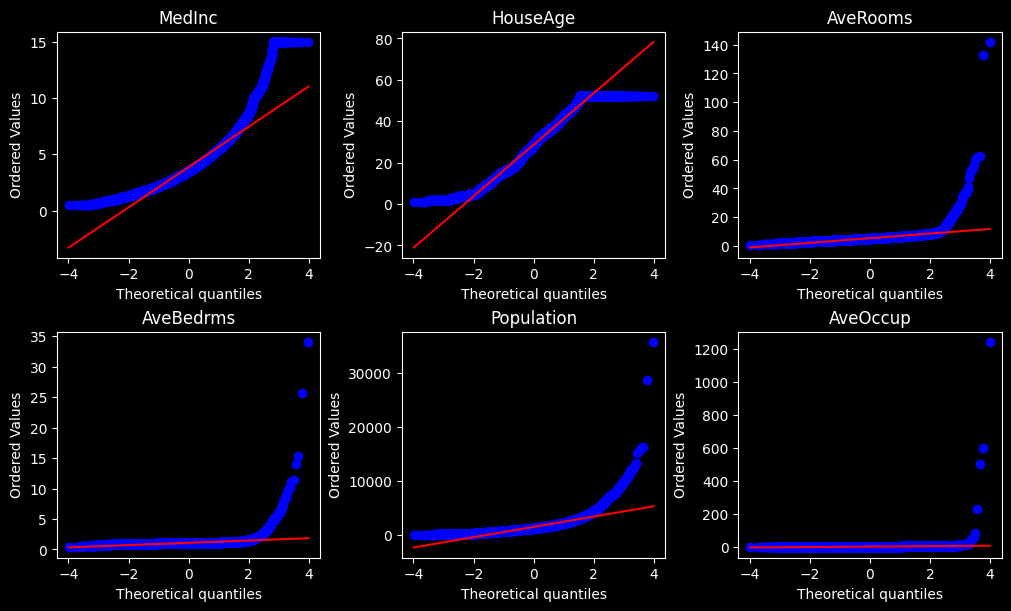

In [38]:
make_qqplot(X)

In [40]:
from sklearn.preprocessing import PowerTransformer
X_tf4 = X.copy()
transformer = PowerTransformer(method ="box-cox",standardize=False).set_output(transform="pandas")
transformer.fit(X)
transformer.lambdas_

array([ 0.09085449,  0.80939809, -0.2980049 , -1.62900026,  0.23576758,
       -0.47630323])

In [42]:
X_tf4=transformer.transform(X);X_tf4

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,2.337069,23.723216,1.475350,0.023085,12.308116,0.756645
1,2.333598,13.286954,1.410978,-0.029195,22.335341,0.628291
2,2.171691,29.017459,1.568866,0.066936,14.082654,0.814315
3,1.873879,29.017459,1.370082,0.066615,14.598635,0.754737
4,1.432988,29.017459,1.415020,0.073214,14.654092,0.651500
...,...,...,...,...,...,...
20635,0.453991,15.488038,1.284035,0.113228,16.535104,0.757908
20636,0.979953,11.583480,1.399297,0.221297,12.704453,0.878932
20637,0.543627,11.003934,1.303230,0.103551,17.412274,0.694971
20638,0.642493,11.583480,1.317575,0.139802,15.901621,0.632710


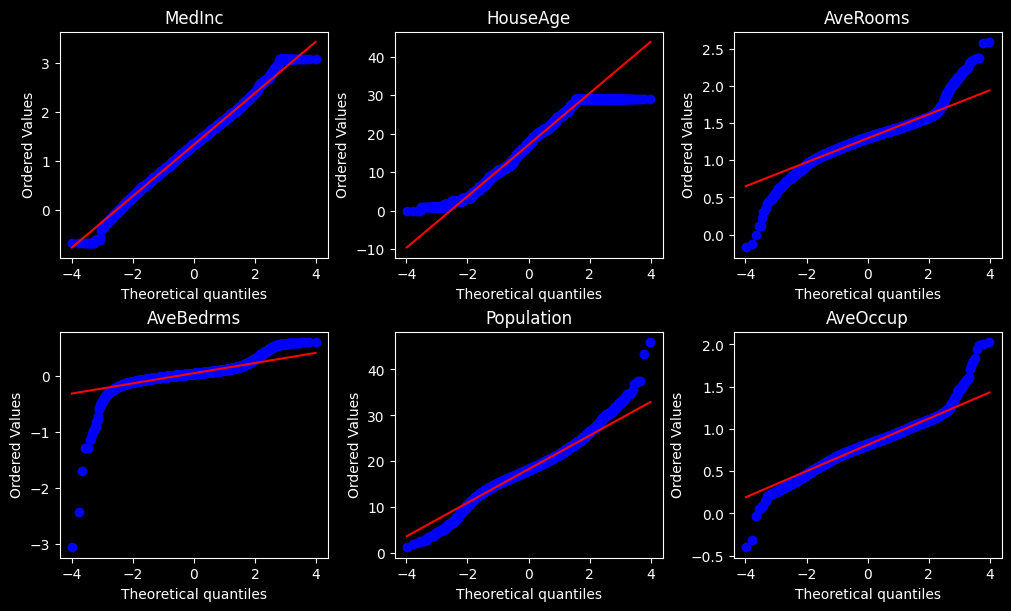

In [43]:
make_qqplot(X_tf4)

In [44]:
transformer = PowerTransformer(method = "yeo-johnson",standardize=False).set_output(transform="pandas")
transformer.fit(X)
transformer.lambdas_

array([-0.19850989,  0.80814809, -0.5536698 , -4.39408222,  0.23352364,
       -0.90134563])

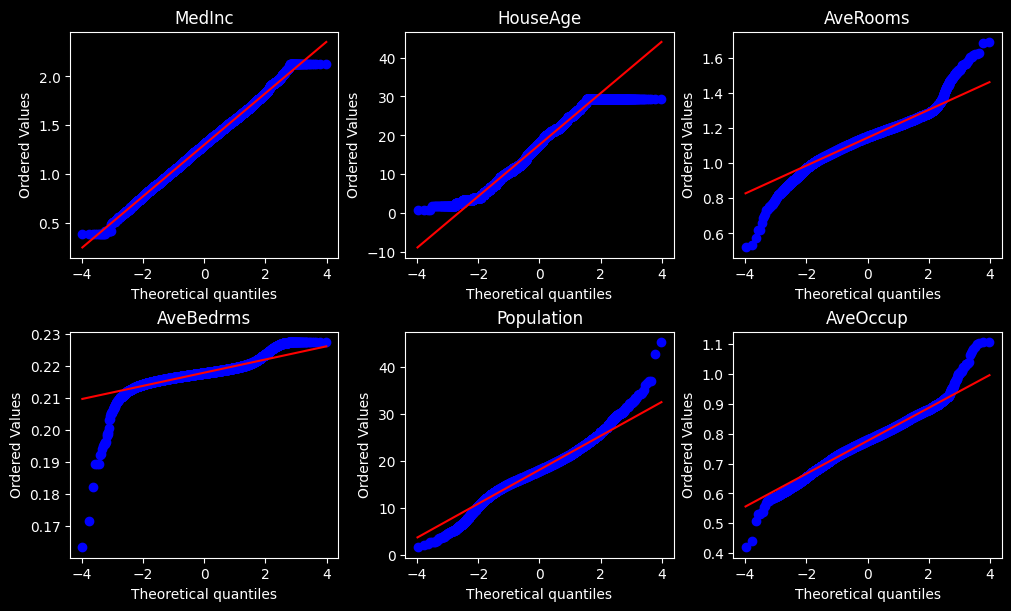

In [45]:
X_tf4 = transformer.transform(X)
make_qqplot(X_tf4)

In [46]:
from feature_engine.transformation import BoxCoxTransformer
btc = BoxCoxTransformer()
btc.fit(X)
btc.lambda_dict_

{'MedInc': 0.09085449361507383,
 'HouseAge': 0.8093980940712507,
 'AveRooms': -0.2980048976549959,
 'AveBedrms': -1.6290002625859639,
 'Population': 0.23576757812051324,
 'AveOccup': -0.4763032278973292}

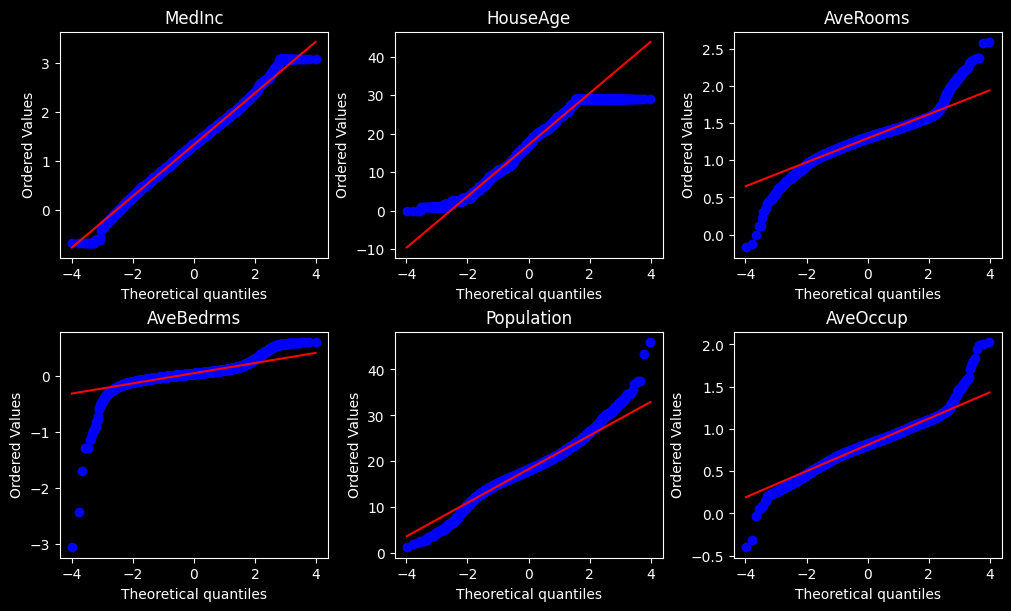

In [47]:
X_tf = btc.transform(X)
make_qqplot(X_tf)

In [48]:
from feature_engine.transformation import YeoJohnsonTransformer
yeo = YeoJohnsonTransformer()
yeo.fit(X)
yeo.lambda_dict_

{'MedInc': -0.1985098937827175,
 'HouseAge': 0.8081480895997063,
 'AveRooms': -0.5536698033957893,
 'AveBedrms': -4.3940822236920365,
 'Population': 0.23352363517075606,
 'AveOccup': -0.9013456270549428}

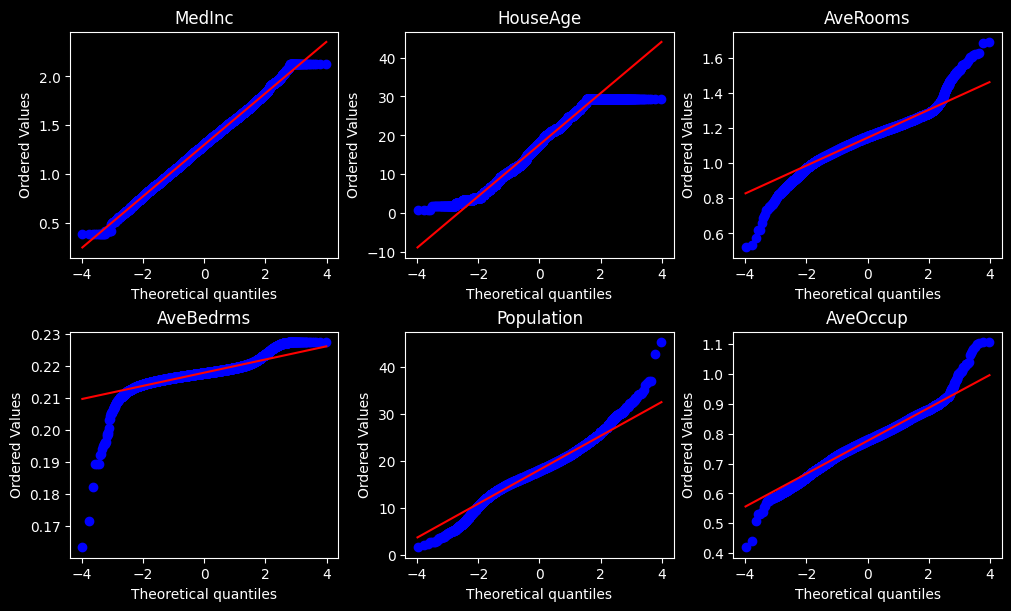

In [49]:
X_tf = yeo.transform(X)
make_qqplot(X_tf)

In [50]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [53]:
vars_ = [
  'mean compactness',
  'mean concavity',
  'mean concave points',
  'mean fractal dimension',
  'smoothness error',
  'compactness error',
  'concavity error',
  'concave points error',
  'symmetry error',
  'fractal dimension error',
  'worst symmetry',
  'worst fractal dimension']

In [54]:
from feature_engine.transformation import ArcsinTransformer
tf = ArcsinTransformer(variables = vars_)
tf.fit(X_train)

ArcsinTransformer(variables=['mean compactness', 'mean concavity',
                             'mean concave points', 'mean fractal dimension',
                             'smoothness error', 'compactness error',
                             'concavity error', 'concave points error',
                             'symmetry error', 'fractal dimension error',
                             'worst symmetry', 'worst fractal dimension'])

In [55]:
train_t = tf.transform(X_train)
test_t = tf.transform(X_test)

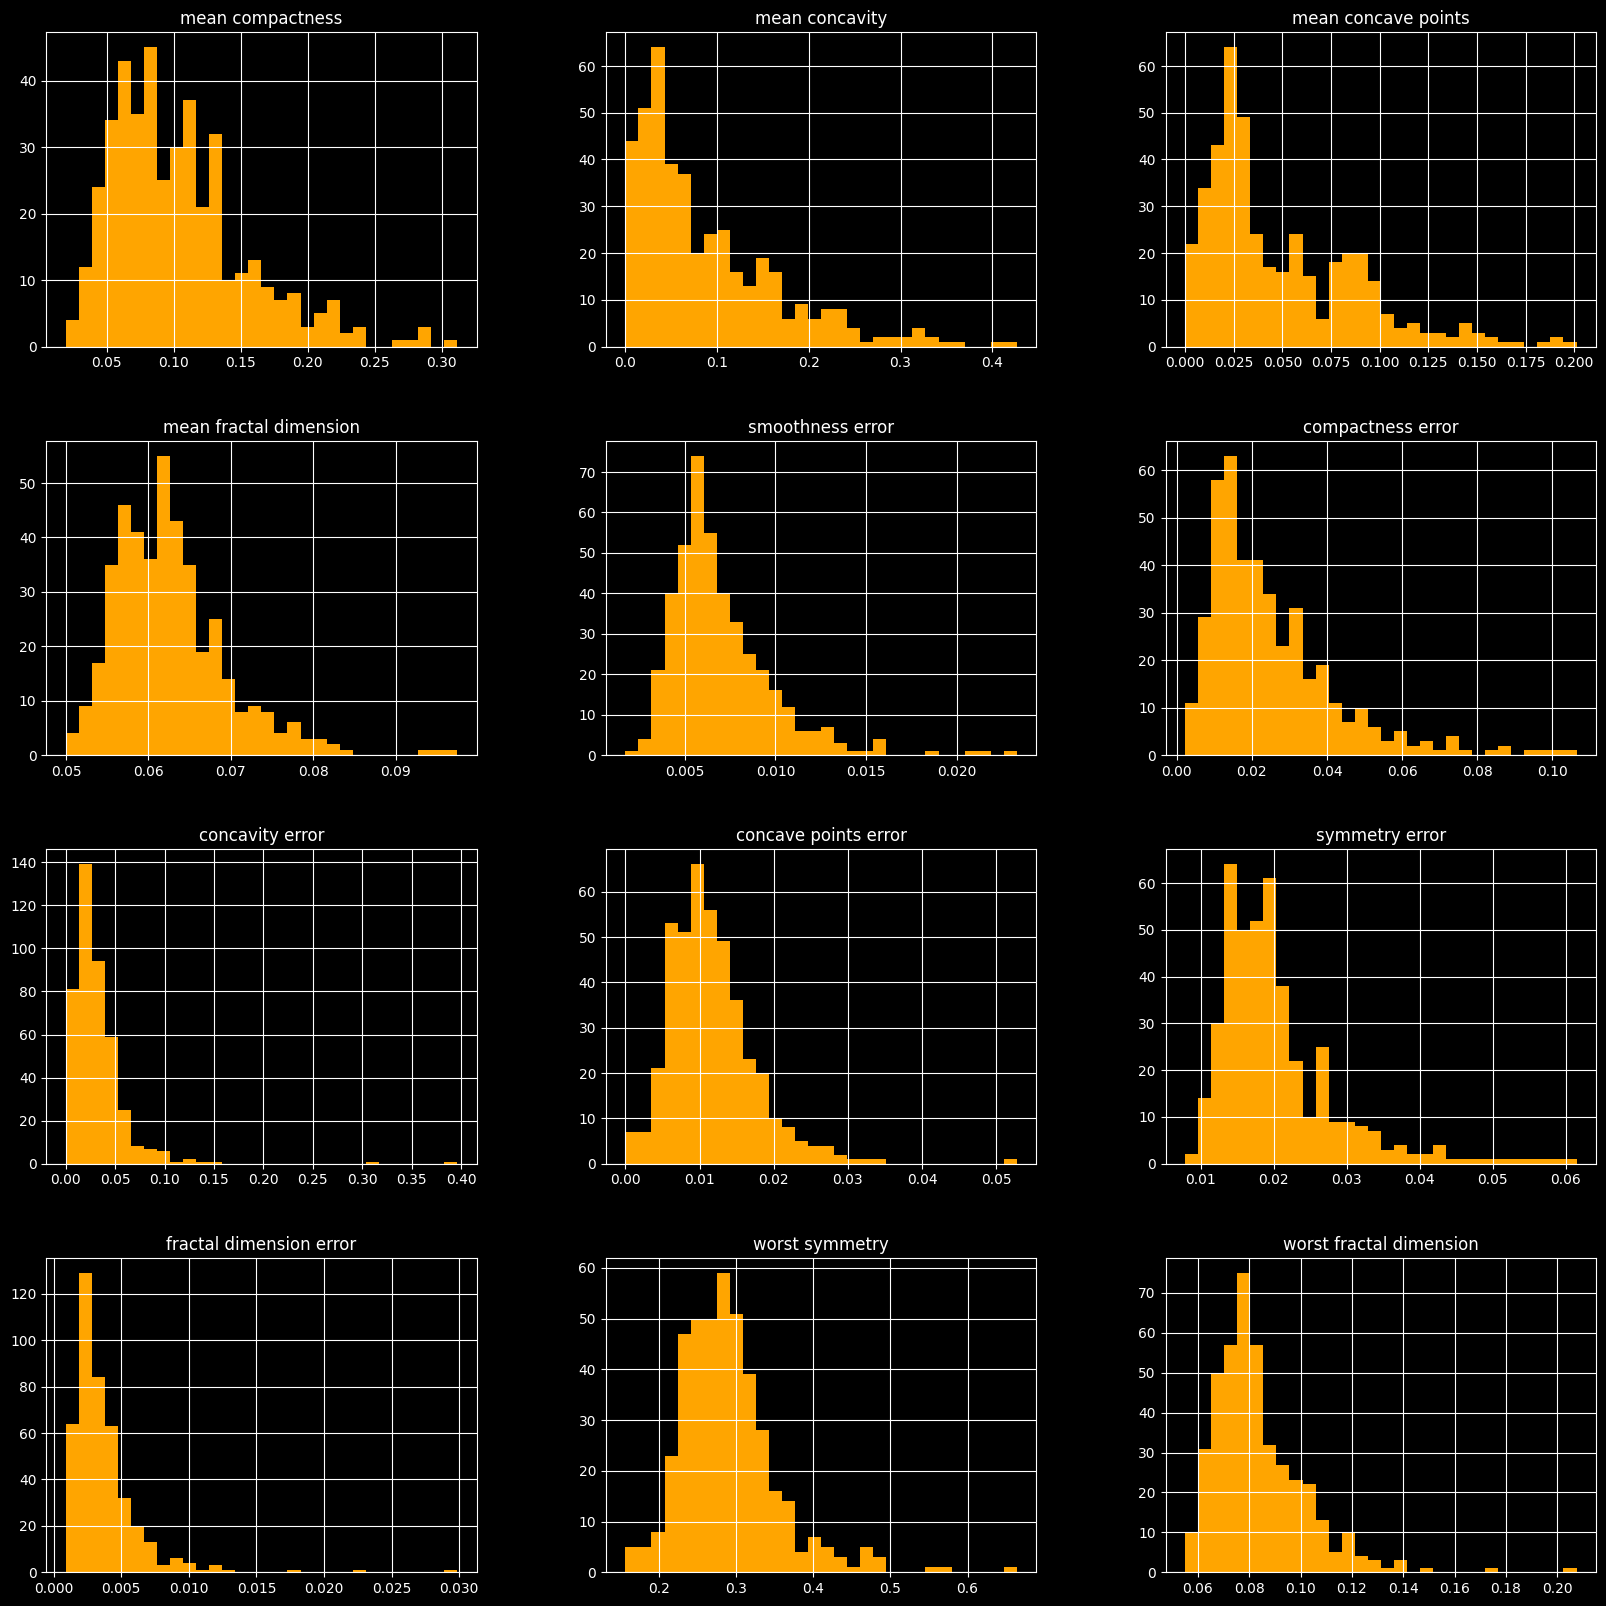

In [57]:
X_train[vars_].hist(figsize=(20,20), bins=30,color="orange")
plt.show()

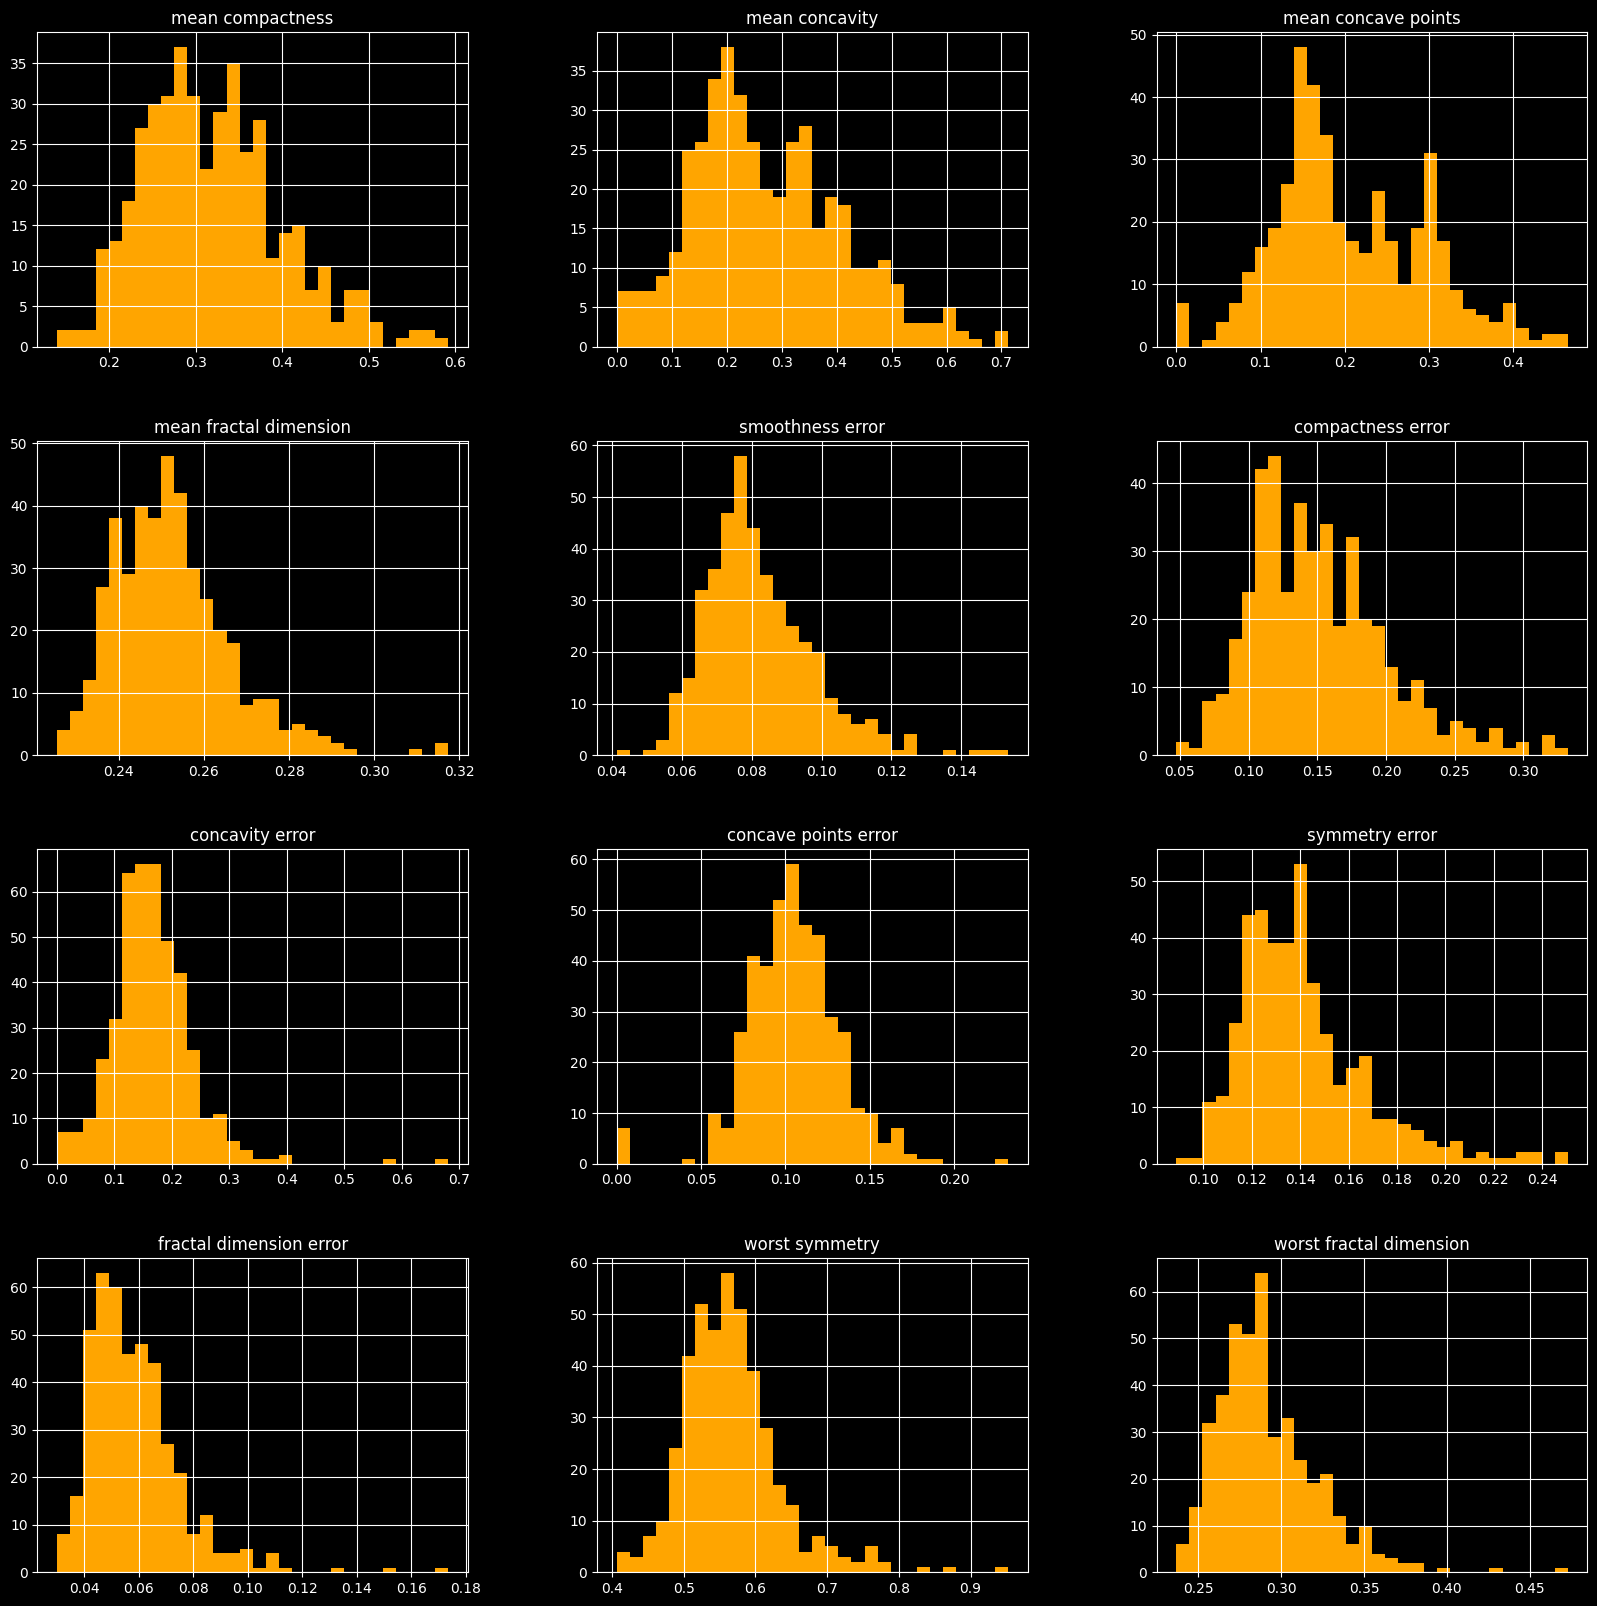

In [58]:
train_t[vars_].hist(figsize=(20,20), bins=30,color="orange")
plt.show()

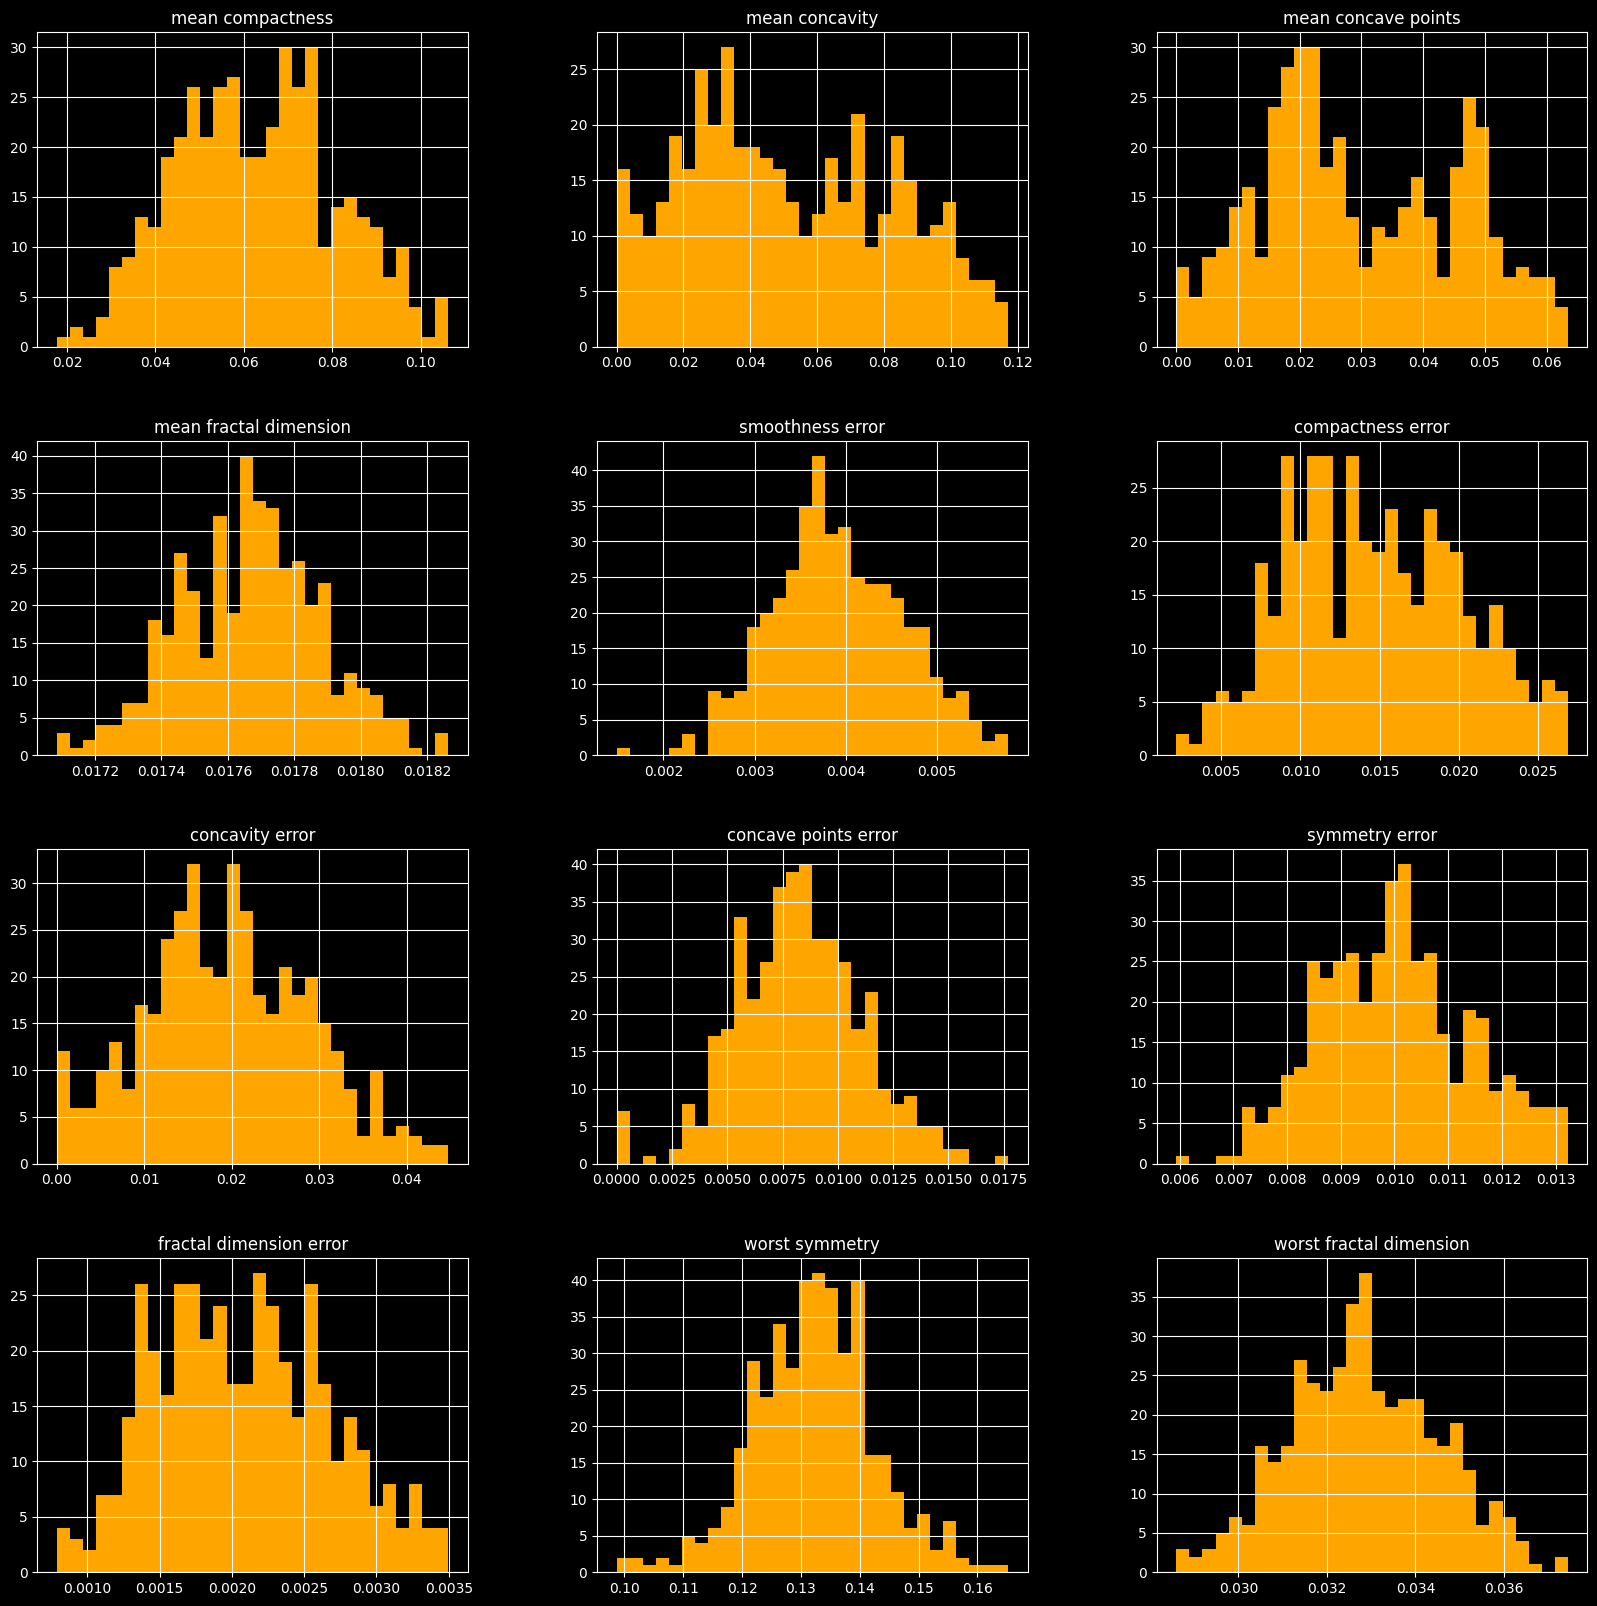

In [61]:
yeo = YeoJohnsonTransformer()
yeo.fit(X_train[vars_])
train_t2 = yeo.transform(X_train[vars_])
train_t2.hist(figsize=(20,20), bins=30,color="orange")
plt.show()